# 用 Pandas 產生樞紐報表 (pivot table)

樞紐報表是 Excel 非常强大的功能，可以將大量的資料，依照制定的資料樣式重新分類整合。只要確定了新分類的表格樣式，透過簡單的操作就可以輕鬆產生新的報表。

![](./images/2.png)

若今天樞紐報表十分複雜，在圖像化界面上就很難快速的透過手動的方式快速的產生樞紐報表。

但是今天我們若希望透過程式自動化的方式來產生樞紐報表，我們其實可以活用 Pandas 的 DataFrame 產生樞紐報表，不但效率快，而且語法十分簡單。

官方文件: [連結](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [1]:
import pandas as pd

df = pd.read_excel(r"pivot_table.xlsx", index_col="訂單號碼",sheet_name="銷售數據")
df

,日期,商店,業務員,產品,金額
訂單號碼,,,,,
A0001,2017-01-01,松仁超商,簡家凡,香蕉,10185
A0002,2017-01-06,尚林食品公司,柯佳偉,芒果,13680
A0003,2017-01-07,快樂水果運銷,朱明樺,柚子,6116
A0004,2017-01-09,品國水國行,林玟君,芒果,13136
A0005,2017-01-09,三華超商,朱明樺,蕃茄,16440
A0006,2017-01-10,尚林食品公司,王宇倫,香蕉,11795
A0007,2017-01-10,尚林食品公司,王宇倫,香蕉,10392
A0008,2017-01-15,品國水國行,朱明樺,芒果,17118
A0009,2017-01-15,尚林食品公司,簡家凡,柚子,19280


In [3]:
df.groupby("產品").sum() #groupby->針對某分類做分群

,金額
產品,
柚子,721468
芒果,733462
蕃茄,691683
蘋果,869380
香蕉,542911


## Pandas 的 groupby 功能

先厘清我們是要以哪一欄做分類，將該欄的名稱以字串的方式指定給 **by**

**DataFrame.groupby(by="欄位名稱")**

In [2]:
# 以產品的項目對 DataFrame 的資料做分類，將分類出來的結果做加總
report_df = df.groupby(by="產品", sort=True).sum()
report_df

,金額
產品,
柚子,721468
芒果,733462
蕃茄,691683
蘋果,869380
香蕉,542911


In [4]:
# 問題是加總起來的資料並非依照大小來排列，所以我們就手動來排列資料
final_report_df = report_df.sort_values(by="金額", ascending=False)  #ascending->遞增
final_report_df

,金額
產品,
蘋果,869380
芒果,733462
柚子,721468
蕃茄,691683
香蕉,542911


## df.sum()

`df["欄名"].sum()` 會將指定一欄的資料加總起來 

In [5]:
final_report_df['金額'].sum()

3558904

In [6]:
# 將所有的金額都除上加總，算出每一種水果的銷量的百分比
final_report_df['金額'] / final_report_df['金額'].sum()

產品
蘋果    0.244283
芒果    0.206092
柚子    0.202722
蕃茄    0.194353
香蕉    0.152550
Name: 金額, dtype: float64

In [7]:
# 問題是這樣的數字依然不明顯，所以我們另外在 DataFrame 加入新的一欄，計算出每一種水果的銷量的百分比
report_df["比例%"] =  report_df["金額"] * 100 / report_df["金額"].sum()
#兩層分析
report_df

,金額,比例%
產品,,
柚子,721468,20.272196
芒果,733462,20.609210
蕃茄,691683,19.435281
蘋果,869380,24.428307
香蕉,542911,15.255005


In [8]:
# 問題是加總起來的資料並非依照大小來排列，所以我們就手動來排列資料
final_report_df = report_df.sort_values(by="金額", ascending=False)
final_report_df

,金額,比例%
產品,,
蘋果,869380,24.428307
芒果,733462,20.609210
柚子,721468,20.272196
蕃茄,691683,19.435281
香蕉,542911,15.255005


# 令一種實作樞紐報表的功能：pivot_table 方法

用法：
```python
pd.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All')
```

看似很複雜，但從實務的角度來看，需要搞懂的是以下幾個最重要的參數：

- index
- columns
- aggfunc

官方文件：[連結](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [9]:
# 首先，任何樞紐報表都需要 index，也就是分類用的欄位，下面這邊我們是以 “產品” 這一欄爲例
pd.pivot_table(df, index=["產品"])

,金額
產品,
柚子,16778.325581
芒果,18336.550000
蕃茄,19762.371429
蘋果,18497.446809
香蕉,15511.742857


In [10]:
# 接下來我們需要指定一個聚合資料時的函數 / 算法，這邊我們會使用 numpy 的加總函數 (np.sum)
# pivot_table 預設的 aggfunc 是 mean，代表計算平均值
import numpy as np

pd.pivot_table(df, index=["產品"], aggfunc=np.sum)

,金額
產品,
柚子,721468
芒果,733462
蕃茄,691683
蘋果,869380
香蕉,542911


In [11]:
# 針對加總之後的金額做排序
report = pd.pivot_table(df, index=["產品"], aggfunc=np.sum).sort_values(by="金額", ascending=False)
report

,金額
產品,
蘋果,869380
芒果,733462
柚子,721468
蕃茄,691683
香蕉,542911


另外，columns 參數允許我們針對 index 的值做分類之後，再利用另一欄的值進行分層：

In [12]:
pd.pivot_table(df, index="產品", columns="業務員", aggfunc=np.sum)

金額                                
業務員    朱明樺     林玟君     柯佳偉     王宇倫     簡家凡
產品                                        
柚子   91827   65658  110693  190323  262967
芒果   86637   99623  274784  169697  102721
蕃茄   94602  110307   84267  233280  169227
蘋果   17531  179456  165890  271724  234779
香蕉   64210   96808  120706  174546   86641

In [13]:
# 也可針對時間進行分層
pd.pivot_table(df, index=["產品"], columns=["日期"])

金額                                                         \
日期 2017-01-01 2017-01-06 2017-01-07 2017-01-09 2017-01-10 2017-01-15   
產品                                                                     
柚子        NaN        NaN     6116.0        NaN        NaN    19770.0   
芒果        NaN    13680.0        NaN    13136.0        NaN    17118.0   
蕃茄        NaN        NaN        NaN    16440.0        NaN        NaN   
蘋果        NaN        NaN        NaN        NaN        NaN    12270.0   
香蕉    10185.0        NaN        NaN        NaN    11093.5        NaN   

                                                  ...                 \
日期 2017-01-17 2017-01-19 2017-01-21 2017-01-23    ...     2017-11-28   
產品                                                ...                  
柚子        NaN    17312.0        NaN        NaN    ...            NaN   
芒果    17072.0        NaN        NaN    14136.0    ...        11380.0   
蕃茄        NaN        NaN        NaN        NaN    ...            NaN   
蘋果        NaN        NaN     8996.0        NaN    ...         5674.0   
香蕉        NaN        NaN        NaN        NaN    ...            NaN   

                                                                      \
日期 2017-11-29 2017-11-30 2017-12-02 2017-12-04 2017-12-05 2017-12-06   
產品                                                                     
柚子        NaN        NaN        NaN    13764.0     7164.0        NaN   
芒果    29000.0    16360.0        NaN        NaN        NaN    28736.0   
蕃茄        NaN        NaN        NaN        NaN        NaN        NaN   
蘋果        NaN        NaN    22988.0        NaN        NaN        NaN   
香蕉        NaN        NaN        NaN        NaN        NaN        NaN   

                                     
日期 2017-12-12 2017-12-15 2017-12-17  
產品                                   
柚子    18185.0        NaN        NaN  
芒果        NaN        NaN        NaN  
蕃茄    33129.0        NaN        NaN  
蘋果        NaN    14760.0     9860.0  
香蕉        NaN        NaN        NaN  

[5 rows x 142 columns]

## 練習：

請利用樞紐報表計算出每一個業務員的業績，並且以大到小進行排序

In [17]:
df2 = pd.pivot_table(df, index=["業務員"], aggfunc=np.sum).sort_values(by="金額", ascending=False)
df2
#df.groupby(by="業務員").....

,金額
業務員,
王宇倫,1039570
簡家凡,856335
柯佳偉,756340
林玟君,551852
朱明樺,354807


# pivot_table vs groupby

兩者都是產生樞紐報表的功能，而 pivot_table 由於有 columns 參數，所以比 groupby **稍微更彈性，但是使用上也更複雜一點。**

# 產生圓餅圖

使用 Matplotlib 來產生樞紐報表的圓餅圖：

In [19]:
# 引入 pyplot
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
# 指定字體的檔案位置與大小
myfont = FontProperties(fname=r"C:\Users\admin\Downloads\第九課\字體\simhei.ttf", size=14) 

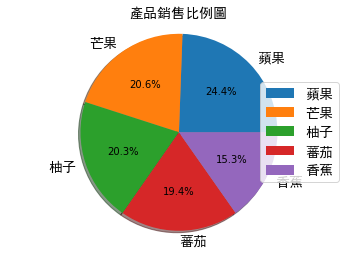

In [20]:
# 產生資料
labels = final_report_df.index
data = final_report_df["金額"]
# 畫出圖表
fig = plt.figure()

pictures,category_text,percent_text = plt.pie(data, labels=labels, autopct='%1.1f%%', shadow=True)
# 迭代每一類的文字，設定文字的字體
for t in category_text:
    t.set_fontproperties(myfont)

plt.title("產品銷售比例圖", fontproperties=myfont)
plt.legend(loc="right", prop=myfont, fontsize=10)
plt.axis("equal")
plt.show()

# 最後，若想將 matplotlib 圖表匯出成圖檔
fig.savefig("pivot_chart.jpg") 

# 延伸閱讀

- 官方網站：[連結](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)